# Unit 5 - Financial Planning


In [92]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [93]:
# Set current amount of crypto assets

crypto_data = {
    "amount": [1.2, 5.3]
}

# Set the tickers
my_coins = ["BTC", "ETH"]
my_btc= 1.2
my_eth = 5.3

# Create the shares DataFrame
df_coins = pd.DataFrame(crypto_data, index=my_coins)

# Display shares data
df_coins


amount
BTC     1.2
ETH     5.3

In [94]:
load_dotenv()

True

In [95]:
# # Set Alpaca API key and secret
# alternative_api_key = os.getenv("API_CRYPTO_KEY")
# print(alternative_api_key )
# print(f"Alternative Free Crypto Key type: {type(alternative_api_key)}")

In [96]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD" 



In [97]:
btc_response_data = requests.get("https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD").json()
eth_response_data = requests.get("https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD").json()
btc_response_data
eth_response_data
print(json.dumps(btc_response_data, indent=4))
print(json.dumps(eth_response_data, indent=4))


{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18523112,
            "total_supply": 18523112,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 12391.97,
                    "volume_24h": 25371848790,
                    "market_cap": 230189920152,
                    "percentage_change_1h": 0.187474860699568,
                    "percentage_change_24h": 4.61430821367112,
                    "percentage_change_7d": 8.45312368365832,
                    "percent_change_1h": 0.187474860699568,
                    "percent_change_24h": 4.61430821367112,
                    "percent_change_7d": 8.45312368365832
                },
                "CAD": {
                    "price": 16249.590261,
                    "volume_24h": 33270105318.327,
                    "

In [98]:
# Select fact 
# Fetch current BTC price
current_btc_price = btc_response_data['data']['1']['quotes']['USD']['price']
my_btc_value = round(my_btc * current_btc_price, 2)

# Fetch current ETH price
current_eth_price = eth_response_data['data']['1027']['quotes']['USD']['price']
my_eth_value = round(my_eth * current_eth_price, 2)

# Compute current value of my crpto
current_value_of_my_crypto = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The current value of my crypto portfolio is ${current_value_of_my_crypto:0.2f}")

The current value of your 1.2 BTC is $14870.36
The current value of your 5.3 ETH is $2018.51
The current value of my crypto portfolio is $16888.87


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [99]:
# Current amount of shares
shares_data = {
    "shares": [50, 200]
}

# Set the tickers
tickers = ["SPY", "AGG"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares


shares
SPY      50
AGG     200

In [115]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [116]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_stocks = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_stocks




AGG                                       SPY  \
                             open    high     low    close   volume    open   
2020-10-19 00:00:00-04:00  117.81  117.86  117.72  117.787  3895071  348.62   

                                                             
                             high     low   close    volume  
2020-10-19 00:00:00-04:00  349.33  341.04  342.02  51690440

In [118]:
# Pick AGG and SPY close prices
agg_close_price = float(df_stocks["AGG"]["close"])
spy_close_price = float(df_stocks["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.787
Current SPY closing price: $342.02


In [119]:
# Compute the current value of shares
my_agg = 200
my_spy = 50
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
current_value_of_stock_and_bond_portfolio = my_agg_value + my_spy_value
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of my stock and bond portfolio is ${current_value_of_stock_and_bond_portfolio:0.2f}")


The current value of your 50 SPY shares is $17101.00
The current value of your 200 AGG shares is $23557.40
The current value of my stock and bond portfolio is $40658.40


### Savings Health Analysis

In [120]:
#Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame()
crypto = current_value_of_my_crypto
shares = current_value_of_stock_and_bond_portfolio
data = {"amount": [crypto, shares]}
my_portfolio = ["Crypto", "Shares"]
df_savings = pd.DataFrame(data, index=my_portfolio)
display(df_savings)


amount
Crypto  16888.87
Shares  40658.40

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000197F1EC50D0>],
      dtype=object)

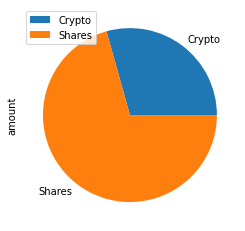

In [121]:
# Plot savings pie chart
df_savings.plot(kind="pie", subplots=True)

In [122]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount_savings = round((crypto + shares), 2)
print(f"My total amount of savings is ${total_amount_savings}")

# Validate saving health
if total_amount_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
elif total_amount_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal")
else:
    print("You are short: ${emergency_fund - total_amount_savings}")

My total amount of savings is $57547.27
Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [123]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [124]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_stocks = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stocks.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [140]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks = MCSimulation(
    portfolio_data = df_stocks,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [141]:
# Printing the simulation input data
MC_stocks.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [142]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1         2          3          4         5         6    \
0     1.000000   1.000000  1.000000   1.000000   1.000000  1.000000  1.000000   
1     1.006242   0.994291  1.004959   1.004063   0.992783  1.010201  1.000076   
2     0.995501   0.992834  1.011867   1.002617   0.991600  1.004656  1.004113   
3     1.001302   0.999450  1.011845   1.011441   1.000156  1.014128  1.019272   
4     1.001253   0.978775  1.008164   1.017668   0.987271  1.007128  1.021825   
...        ...        ...       ...        ...        ...       ...       ...   
7556  2.365722  11.012412  7.245407  12.518986  14.835941  8.925285  2.986415   
7557  2.373243  11.049941  7.273232  12.527598  14.715276  8.858847  2.957367   
7558  2.390327  11.031997  7.270773  12.530522  14.692419  8.921314  2.934792   
7559  2.396447  11.027859  7.219613  12.783023  14.663217  9.055588  2.940377   
7560  2.407791  10.922028  7.230447  12.773420  14.776224  9.033371  2.945252   

            7         8         9    ...        490        491       492  \
0      1.000000  1.000000  1.000000  ...   1.000000   1.000000  1.000000   
1      0.997862  1.006345  1.001366  ...   1.001246   0.989697  0.996252   
2      1.005193  1.000739  1.004368  ...   0.997208   1.000059  0.998947   
3      1.000950  0.996173  1.001754  ...   0.997346   0.988481  0.999158   
4      1.016586  0.993083  0.985191  ...   0.991633   1.000457  0.985538   
...         ...       ...       ...  ...        ...        ...       ...   
7556  19.652092  8.170544  2.380235  ...  14.340872  12.843853  8.515810   
7557  19.391418  8.327881  2.363426  ...  14.350330  12.782816  8.664367   
7558  19.485524  8.356099  2.359368  ...  14.513734  12.760746  8.576191   
7559  19.529183  8.255100  2.373144  ...  14.740381  12.772312  8.598925   
7560  19.140888  8.304563  2.375040  ...  14.716633  12.814284  8.632250   

           493       494       495        496       497       498        499  
0     1.000000  1.000000  1.000000   1.000000  1.000000  1.000000   1.000000  
1     0.999642  1.006705  0.997249   1.000829  0.996409  0.996669   1.002455  
2     0.997057  1.004656  0.993877   1.003852  0.995703  1.000519   1.001539  
3     1.000030  1.005924  0.974116   1.005231  1.011210  1.003349   0.999197  
4     0.997128  1.001746  0.973072   1.005832  1.007371  1.000196   0.983699  
...        ...       ...       ...        ...       ...       ...        ...  
7556  7.413055  9.177448  9.161674  14.181033  6.169308  6.785960  12.387756  
7557  7.405452  9.151558  9.194733  14.170088  6.125714  6.733985  12.421853  
7558  7.391311  9.192371  9.245384  14.237757  6.196766  6.734252  12.445703  
7559  7.355056  9.181650  9.323530  14.380448  6.192966  6.692239  12.552441  
7560  7.362224  9.229489  9.228372  14.350275  6.154598  6.683727  12.785725  

[7561 rows x 500 columns]

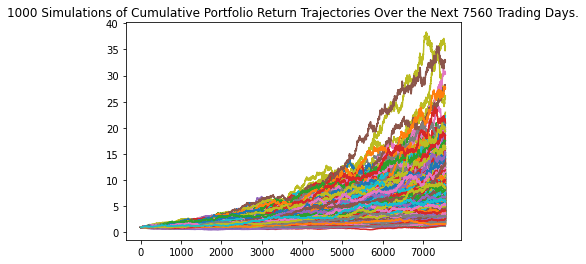

In [131]:
# Plot simulation outcomes
line_plot = MC_stocks.plot_simulation()

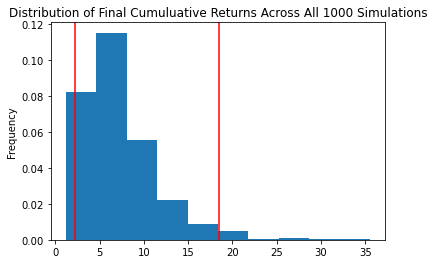

In [132]:
# Plot probability distribution and confidence intervals
bar_plot = MC_stocks.plot_distribution()

### Retirement Analysis

In [133]:
# Fetch summary statistics from the Monte Carlo simulation results
stocks_tbl = MC_stocks.summarize_cumulative_return()


# Print summary statistics
print(stocks_tbl)

count           1000.000000
mean               7.305971
std                4.273586
min                1.193698
25%                4.405559
50%                6.265082
75%                9.192772
max               35.539314
95% CI Lower       2.188708
95% CI Upper      18.490164
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [134]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(stocks_tbl[8]*20000,2)
ci_upper = round(stocks_tbl[9]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $43774.16 and $369803.28


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [137]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
new_ci_lower = round(stocks_tbl[8]* initial_investment,2)
new_ci_upper = round(stocks_tbl[9]* initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${new_ci_lower} and ${new_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $65661.24 and $554704.93


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns


In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.002773  0.995921  0.995673  0.994602  1.005021  0.998532  1.001126   
2     1.004519  0.994920  0.995504  0.997885  0.999418  1.002665  0.998714   
3     1.003420  0.989709  0.994363  1.001670  1.004349  1.002377  1.001845   
4     0.999165  0.990064  0.986792  1.003455  1.007765  1.007514  0.997581   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.266580  1.196174  1.233861  1.609848  1.173492  1.242440  1.329611   
1257  1.259830  1.201814  1.231141  1.621046  1.172662  1.239173  1.331916   
1258  1.265916  1.196261  1.226184  1.622075  1.174943  1.240829  1.335755   
1259  1.268268  1.202293  1.223321  1.623647  1.170809  1.248084  1.336792   
1260  1.275078  1.204666  1.221803  1.620920  1.170916  1.244088  1.333824   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.005124  0.994500  0.999171  ...  1.002697  1.007377  0.999067   
2     1.009062  0.992389  0.997706  ...  1.004034  1.008911  0.999323   
3     1.011481  0.991912  0.994580  ...  1.002351  1.006664  1.002174   
4     1.015886  0.986637  0.998216  ...  1.002834  0.999865  1.000353   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.157732  1.354542  0.980124  ...  1.193369  1.265576  1.176646   
1257  1.157722  1.354061  0.980815  ...  1.194320  1.269009  1.182694   
1258  1.157986  1.350916  0.981539  ...  1.203336  1.271746  1.178878   
1259  1.162289  1.341674  0.977214  ...  1.200892  1.273981  1.175435   
1260  1.162788  1.346848  0.974308  ...  1.198225  1.272588  1.179043   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.997822  0.998338  1.003092  0.997770  1.005395  0.999348  1.005300  
2     1.000654  0.999466  1.004265  0.994733  1.003748  0.996511  1.012382  
3     0.998934  1.003854  1.010202  0.996131  1.002018  0.999665  1.014892  
4     1.003079  1.003303  1.012221  0.997754  1.000544  1.001517  1.013704  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.146853  1.214548  1.145207  1.193672  1.131104  1.003777  1.234636  
1257  1.146907  1.213701  1.143455  1.200143  1.131160  1.006530  1.234546  
1258  1.148263  1.213656  1.146064  1.197322  1.134041  1.005902  1.236184  
1259  1.145972  1.210717  1.146312  1.194024  1.132655  1.007751  1.242664  
1260  1.141526  1.218961  1.151264  1.193754  1.134594  1.007345  1.243278  

[1261 rows x 500 columns]

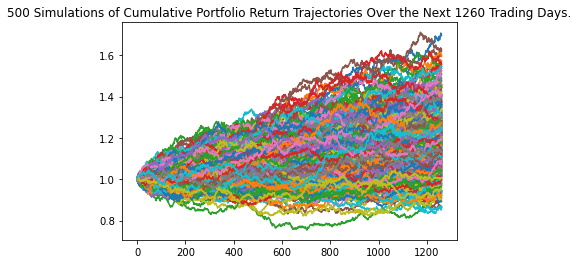

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

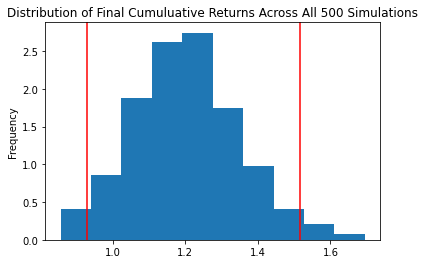

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.202273
std               0.145565
min               0.856322
25%               1.100622
50%               1.197687
75%               1.292270
max               1.695081
95% CI Lower      0.928556
95% CI Upper      1.517173
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $55713.36 and $91030.38


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.997817  0.998428  1.000816  1.000202  1.002120  0.998788  1.004226   
2     0.994703  0.996223  1.001987  0.998816  1.002372  0.996708  1.009074   
3     0.994115  0.993375  0.992622  1.001069  0.999700  1.000123  1.011610   
4     0.999040  0.997821  0.992272  0.999767  1.000459  1.006178  1.008906   
...        ...       ...       ...       ...       ...       ...       ...   
2516  2.164254  1.246948  1.441080  1.685210  1.702114  1.474774  1.535126   
2517  2.169555  1.246315  1.436260  1.685058  1.697652  1.479128  1.536203   
2518  2.169089  1.243387  1.426446  1.685480  1.714264  1.479079  1.537777   
2519  2.170695  1.238881  1.419187  1.670521  1.720418  1.478161  1.544292   
2520  2.166411  1.238568  1.422756  1.668923  1.720600  1.480128  1.538224   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.004250  1.001431  1.000740  ...  0.995519  1.001253  1.000492   
2     1.006986  1.006219  0.995591  ...  0.991815  1.001091  1.003774   
3     1.009254  1.012194  0.998619  ...  0.992699  1.003085  1.005997   
4     1.009897  1.014282  0.995619  ...  0.997683  1.007825  1.007858   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.288182  1.138653  1.500977  ...  1.367442  1.357662  1.661583   
2517  1.288485  1.144082  1.498097  ...  1.366833  1.360457  1.672969   
2518  1.289258  1.140795  1.496271  ...  1.368088  1.357853  1.662915   
2519  1.296500  1.137510  1.499085  ...  1.370125  1.359697  1.664317   
2520  1.292365  1.138481  1.501295  ...  1.368816  1.361692  1.666635   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.994026  1.006129  1.002356  1.005233  0.999769  1.002106  1.003746  
2     0.989341  1.007530  1.009809  1.007273  0.999666  1.006340  0.998303  
3     0.991536  1.004239  1.010765  1.009501  0.999652  1.011737  0.998762  
4     0.991188  1.009171  1.009303  1.008223  1.003270  1.014350  1.001691  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.348599  1.649220  1.782632  1.450872  1.701338  1.199957  1.171159  
2517  1.351751  1.646287  1.781356  1.459438  1.695322  1.197466  1.171882  
2518  1.354957  1.637911  1.781046  1.451367  1.695901  1.201111  1.172847  
2519  1.352170  1.633762  1.778638  1.443413  1.699061  1.191529  1.166331  
2520  1.349637  1.633255  1.781666  1.442561  1.699977  1.197157  1.165888  

[2521 rows x 500 columns]

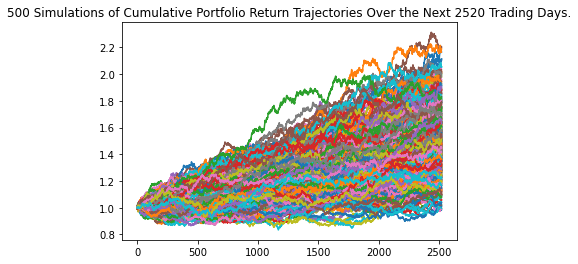

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

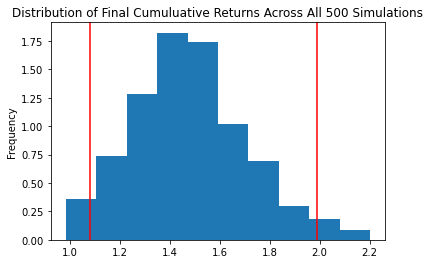

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.477364
std               0.230147
min               0.984413
25%               1.319127
50%               1.468676
75%               1.613270
max               2.202006
95% CI Lower      1.083048
95% CI Upper      1.990417
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $64982.9 and $119425.0
